<center><h2>Midterm - Data Science option</h2></center>

This is one of two options for the midterm. 

This option is in-depth analysis of online shopping behavior.  

We are asking you to do intensive analysis of consumer behavioral data.

The data
----

The dataset is from "Online Shoppers Purchasing Intention Dataset Data Set" https://archive.ics.uci.edu/ml/datasets/Online+Shoppers+Purchasing+Intention+Dataset

The data is in the file "online_shoppers_intention.csv". 

- The dataset consists of 10 numerical and 8 categorical variables.
- The 'Revenue' variable can be used as the target label. This variable is imbalanced, such that 84.5% of user journeys did NOT result in a purchase (Revenue=False)
- "Administrative", "Administrative Duration", "Informational", "Informational Duration", "Product Related" and "Product Related Duration" represent the number of different types of pages visited by the visitor in that session and total time spent in each of these page categories. 
- The values of these features are derived from the URL information of the pages visited by the user and updated when a user takes an action, e.g. moving from one page to another. 
- The "Bounce Rate", "Exit Rate" and "Page Value" features represent the metrics measured by "Google Analytics" for each page in the e-commerce site. 
- The value of "Bounce Rate" feature for a web page refers to the percentage of visitors who enter the site from that page and then leave ("bounce") without triggering any other requests to the analytics server during that session. 
- The value of "Exit Rate" feature for a specific web page is calculated as for all page views to the page and it represents the percentage that the page was seen in the last session. 
- The "Page Value" feature represents the average value for a web page that a user visited before completing an e-commerce transaction. 
- The "Special Day" feature indicates the closeness of the site visiting time to a specific special day (e.g. Mother’s Day or Valentine's Day) in which the sessions are more likely to be finalized with transaction. The value of this attribute is determined by considering the dynamics of e-commerce such as the duration between the order date and delivery date. 
- The dataset also includes operating system, browser, region, traffic type, visitor type as returning or new visitor, a boolean value indicating whether the date of the visit is weekend, and month of the year.

The tasks
-----

Perform the following tasks:

1. Task 1 - Build a highly predictive classification model. Train the model on data entries corresponding to the months of June-Dec, and test the model on data entries corresponding to Feb-March. (50 points)

    1. Fit a logistic regression and at least one other classification model. Find and explain important features. 
    1. Report and interpret the most meaningful classifications metrics
    1. Show and explain the hyper-parameter fitting process.

    Point breakdown:
    
    - (10 points) Basic exploratory data analysis (EDA) 
        - Appropriate univariate descriptive statistics and figures
        - Appropriate bivariate descriptive statistics and figures
    - ( 5 points) Advanced EDA
        - Free-response, shows us what they know! 
    - ( 5 points) Train/test split
    - (10 points) Feature selection
    - (15 points) Model fitting
    - ( 5 points) Performance points 
        - F1 score is in the top quartile among all students 


2.  Task 2: Generate user-behavior clusters based on the purchasing behavior data for the complete dataset.  (25 points).

    1. How many clusters do you see? What are the significant differences between the various clusters in terms of the size of the clusters and purchase ratio. Perform as detailed analysis of the clusters as you can.
    2. Return plots and cluster images generated for the data.
    3. Perform a detailed analysis for each cluster corresponding to the variations in features and identify some behaviors corresponding to each particular cluster (e.g,. which cluster represent new shoppers vs. brand conscious shoppers etc.).
    
    Point breakdown:
    
    - (15 points) Clustering code
    - (10 points) Clustering analysis

3. Task 3: Consider you have training data (with the 'Revenue' attribute) for records from June-Sept only. For all records from Oct-Dec, the 'Revenue' attribute is missing. Build a semi-supervised self-labeling model to estimate 'Revenue' for the missing records in Oct-Dec and then fit your classifier. Report classification performance on Feb-March data set with and without the self-labeled data. (15 points)

    1. If you do not consider the records from Oct-Dec, generate the classification performance on test data
    2. After using the self-labeled data and training data together, does the classification performance on test data improve? Discuss which metrics are most important for your conclusion.

    Point breakdown:
    
    - ( 2 points) Correctly splits the data by month into labeled, unlabeled, and test 
    - (8 points) Generate labels for unlabeled samples with a self labeling technique
    - (5 points) Compare and contrast performance difference on test dataset between labels only and labels & self-labels.

-----

Remaining points breakdown:
 - (10 points) Style and clarity
     - Please attempt to write clear, well-commented code and explanations in markdown cells, where appropriate. 

------

Your deliverables:

- Code in a single .ipynb notebook.
- Comments where appropriate.
- Figures, graphs, and tables where appropriate.
- Text explanations (in markdown cells) of what is being done and why.

__That's it. Good Luck!__

Task 1: Build a highly predictive classification model

- Model 1: A binary logistic regression model
- Model 2: Random forest model 

In [2]:
### 1. Load the dataset
import pandas as pd
df = pd.read_csv('online_shoppers_intention.csv')

In [3]:
import numpy as np

### 2. Exploratory data analysis: Basic summary statistics 

# (1) Check dimension of data: 12,330 observations x 17 columns 
print(df.shape)

# (2) Check variable types and missing data
df.info(verbose=True, show_counts=True)
# 10 numerical variables: Administrative, Administrative_Duration, Informational, Informational_Duration, 
#                        ProductRelated, ProductRelated_Duration, BounceRates, ExitRates, PageValues, 
#                        SpecialDay
# 2 Boolean variables: Weekend, Revenue
# 6 Categorical variables: Month (object), OperatingSystems, Browser, Region, TrafficType, VisitorType (object)

# (3) Summary statistics 
print(df.describe())

# (4) Check number of unique values for categorical variables
categorical_var = ['Month', 'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType', 'Weekend', 'Revenue']

print("------------------------------------------------------------------------")

for var in categorical_var: 
    print(f'Count of unique values - {var}:', f'{df[var].nunique()}')

print("------------------------------------------------------------------------")
    
# (5) Show the unique values for each categorical variables 
print("------------------------------------------------------------------------")

for cat_var in categorical_var: 
    print(cat_var + ":")
    print(df[cat_var].unique())
print("------------------------------------------------------------------------")
    

# (6) Check % of True for Revenue and Weekend (Boolean variables)
print("------------------------------------------------------------------------")
print(f"Proportion of True - Revenue: {df['Revenue'].sum()/len(df)}")
print(f"Proportion of True - Weekend: {df['Weekend'].sum()/len(df)}")

# (7) Show first 10 rows
df.head(10)



(12330, 18)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficTyp

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False
5,0,0.0,0,0.0,19,154.216667,0.015789,0.024561,0.0,0.0,Feb,2,2,1,3,Returning_Visitor,False,False
6,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.0,0.4,Feb,2,4,3,3,Returning_Visitor,False,False
7,1,0.0,0,0.0,0,0.000000,0.200000,0.200000,0.0,0.0,Feb,1,2,1,5,Returning_Visitor,True,False
8,0,0.0,0,0.0,2,37.000000,0.000000,0.100000,0.0,0.8,Feb,2,2,2,3,Returning_Visitor,False,False
9,0,0.0,0,0.0,3,738.000000,0.000000,0.022222,0.0,0.4,Feb,2,4,1,2,Returning_Visitor,False,False


Observations from EDA)

1. Variable types: 
- There are 10 numerical variables: Administrative, Administrative_Duration, Informational, Informational_Duration, ProductRelated, ProductRelated_Duration, BounceRates, ExitRates, PageValues, SpecialDay. Their summary statistics are shown above. 
- There are 2 Boolean variables: Weekend, Revenue. Both of them of imbalanced (% of True - Revenue: 15.47%, % of True - Weekend: 23.26%)
- There are 6 categorical variables. Two of them are in object data types. Others are in integer data types. These 6 variables include: Month (object), OperatingSystems, Browser, Region, TrafficType, VisitorType (object). Both the total counts of unique values and distinct values for each variable are shown above.  

2. Variable distribtuion
- Some numerical variables (e.g. durations, counts of different page types) show highly skewed distribution in the descriptive summary statistics. We will visualize this below. 

3. Other comments
- 8 variables (Boolean + categorical) needs to be pro-processed to create proper dummy variables for supervised learning tasks



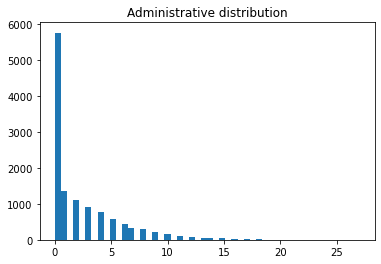

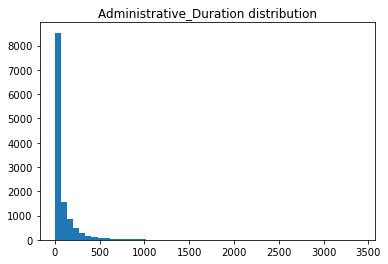

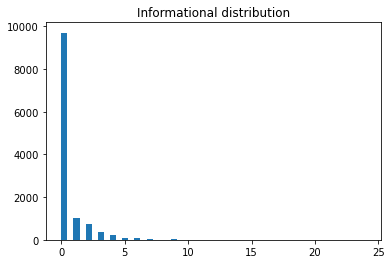

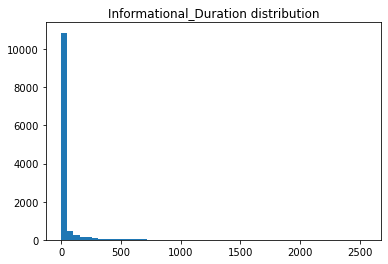

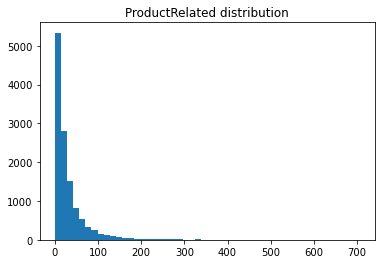

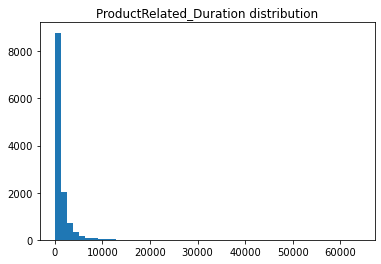

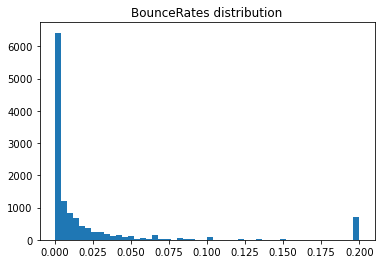

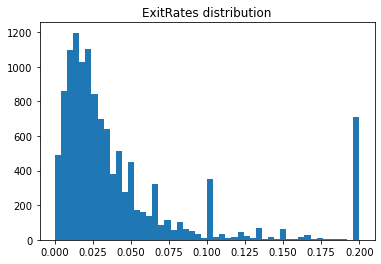

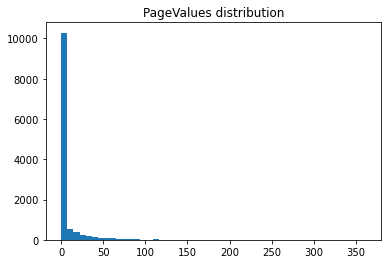

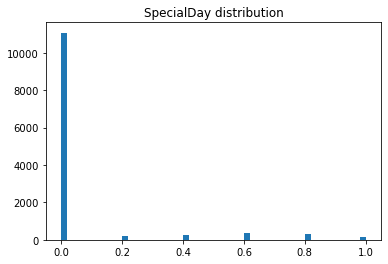

In [4]:
### 3. Exploratory data analysis: Visualization - univariates

import matplotlib.pyplot as plt

numeric_col = ['Administrative', 'Administrative_Duration', 'Informational', 'Informational_Duration', 
               'ProductRelated', 'ProductRelated_Duration', 'BounceRates', 'ExitRates', 'PageValues', 
               'SpecialDay']
# (1) Create histogram for numerical variables 
for col in numeric_col: 
    plt.hist(df[col], bins=50)
    plt.title(f"{col} distribution")
    plt.show()


Observation from histograms)

Almost all numerical variables are skewed with a long tail. BounceRates and ExitRates show another small peaks in the larger values.  



In [6]:
### 4. Data pre-processing - Step 1: Category mapping 

df_processed = df.copy()

# (1) Convert Boolean variables to numerical variables 
binary_col = ['Revenue', 'Weekend']
binary_mapping = {True:1, False: 0}
for col in binary_col: 
    df_processed[col] = df[col].map(binary_mapping)


# (2) Map the months from strings to integers
month_mapping = {'Feb': 2, 'Mar': 3, 'May': 5, 'June': 6, 
                 'Jul':7, 'Aug': 8, 'Sep': 9, 'Oct': 10, 'Nov': 11, 'Dec': 12}
df_processed['Month'] = df['Month'].map(month_mapping)

# (3) Map the visitor types from strings to integers
visitor_mapping = {'Returning_Visitor': 1, 'New_Visitor': 2, 'Other': 3}
df_processed['VisitorType'] = df['VisitorType'].map(visitor_mapping)

# (4) Show first 10 rows of processed data
df_processed.head(10)


,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.0,0.0,2,1,1,1,1,1,0,0
1,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.0,0.0,2,2,2,1,2,1,0,0
2,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.0,0.0,2,4,1,9,3,1,0,0
3,0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.0,0.0,2,3,2,2,4,1,0,0
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.0,0.0,2,3,3,1,4,1,1,0
5,0,0.0,0,0.0,19,154.216667,0.015789,0.024561,0.0,0.0,2,2,2,1,3,1,0,0
6,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.0,0.4,2,2,4,3,3,1,0,0
7,1,0.0,0,0.0,0,0.000000,0.200000,0.200000,0.0,0.0,2,1,2,1,5,1,1,0
8,0,0.0,0,0.0,2,37.000000,0.000000,0.100000,0.0,0.8,2,2,2,2,3,1,0,0
9,0,0.0,0,0.0,3,738.000000,0.000000,0.022222,0.0,0.4,2,2,4,1,2,1,0,0


In [7]:
### 5. Data pre-processing - Step 2: One hot encoding
categorical_cols = ['Month', 'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType']

df_processed[categorical_cols].head()
dummies = pd.get_dummies(df_processed[categorical_cols], prefix = ['Month', 'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType'], prefix_sep='_', drop_first = True, 
columns=categorical_cols)

df_new = df_processed.drop(categorical_cols, axis=1)
df_final = pd.concat([df_new, dummies], axis=1)

print(df_final.info())
df_final.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 69 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Weekend                  12330 non-null  int64  
 11  Revenue                  12330 non-null  int64  
 12  Month_3                  12330 non-null  uint8  
 13  Month_5                  12330 non-null  uint8  
 14  Month_6               

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,...,TrafficType_13,TrafficType_14,TrafficType_15,TrafficType_16,TrafficType_17,TrafficType_18,TrafficType_19,TrafficType_20,VisitorType_2,VisitorType_3
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0


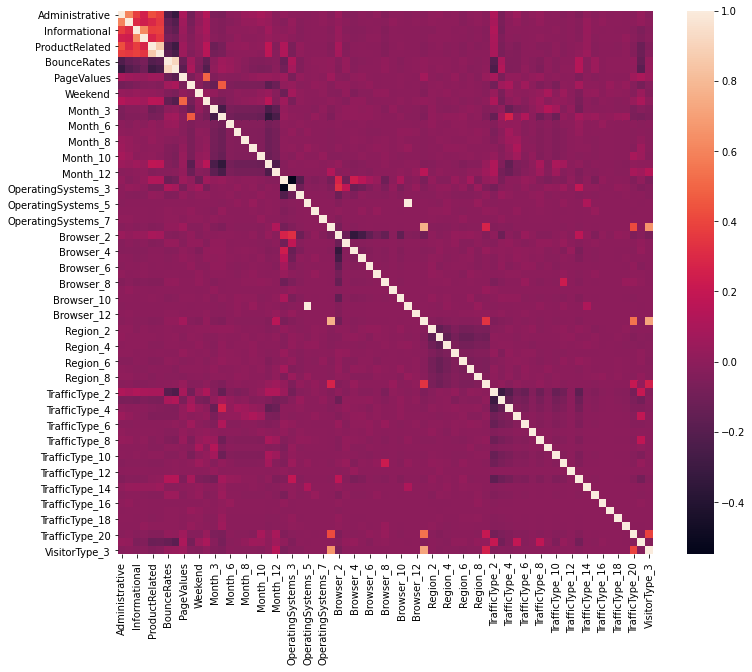

In [8]:
### 6. Exploratory data analysis: Pearson correlations
import matplotlib.pyplot as plt 
import seaborn as sns 

plt.figure(figsize=(12,10))
cor = df_final.corr()
sns.heatmap(cor)
plt.show()

The folloing columns are present in the new df:
Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'BounceRates', 'PageValues',
       'SpecialDay', 'Weekend', 'Revenue', 'Month_3', 'Month_5', 'Month_6',
       'Month_7', 'Month_8', 'Month_9', 'Month_10', 'Month_11', 'Month_12',
       'OperatingSystems_2', 'OperatingSystems_3', 'OperatingSystems_4',
       'OperatingSystems_5', 'OperatingSystems_6', 'OperatingSystems_7',
       'OperatingSystems_8', 'Browser_2', 'Browser_3', 'Browser_4',
       'Browser_5', 'Browser_6', 'Browser_7', 'Browser_8', 'Browser_9',
       'Browser_10', 'Browser_12', 'Browser_13', 'Region_2', 'Region_3',
       'Region_4', 'Region_5', 'Region_6', 'Region_7', 'Region_8', 'Region_9',
       'TrafficType_2', 'TrafficType_3', 'TrafficType_4', 'TrafficType_5',
       'TrafficType_6', 'TrafficType_7', 'TrafficType_8', 'TrafficType_9',
       'TrafficType_10', 'TrafficType_11', 'TrafficType_12', 'T

C:\Users\minhahwang\Anaconda3\lib\site-packages\seaborn\axisgrid.py:392: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axes = plt.subplots(nrow, ncol, **kwargs)


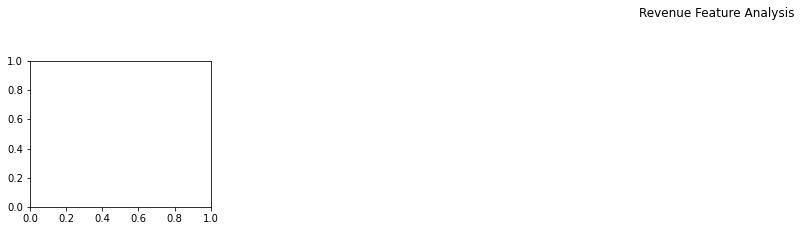

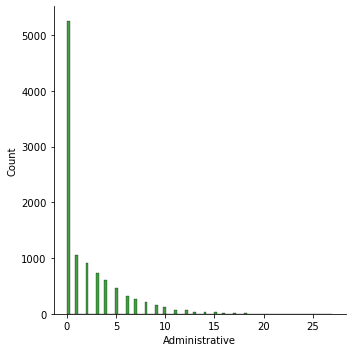

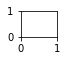

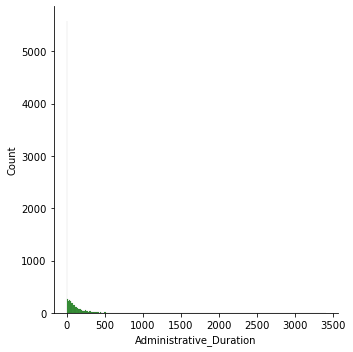

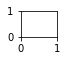

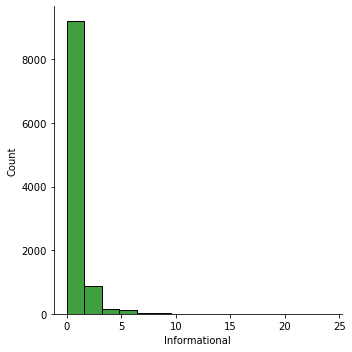

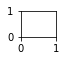

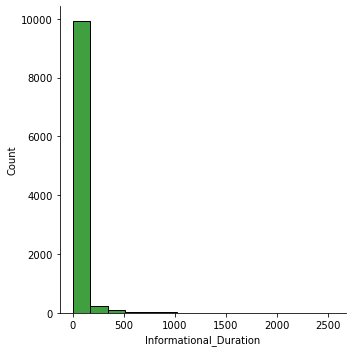

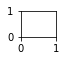

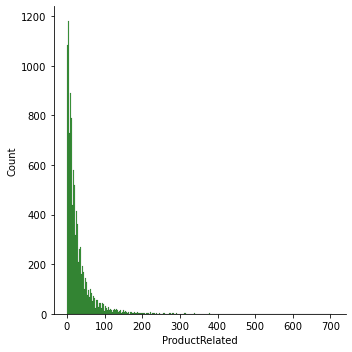

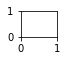

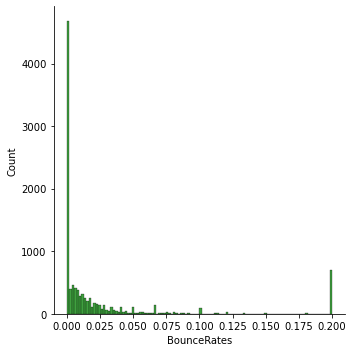

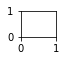

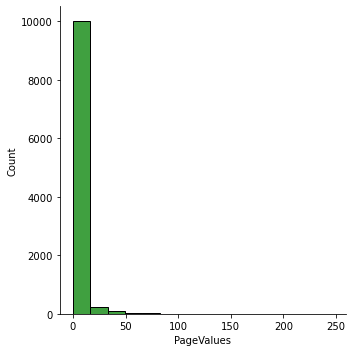

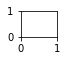

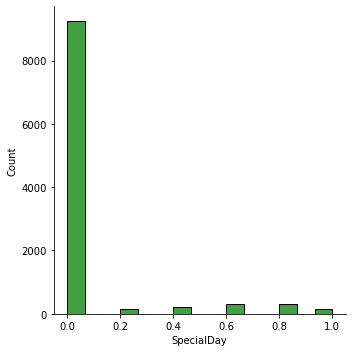

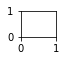

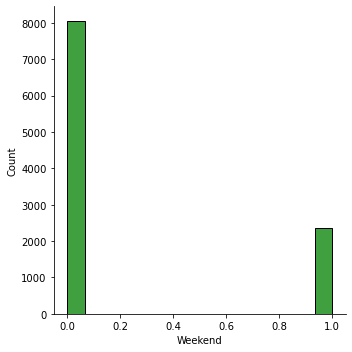

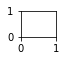

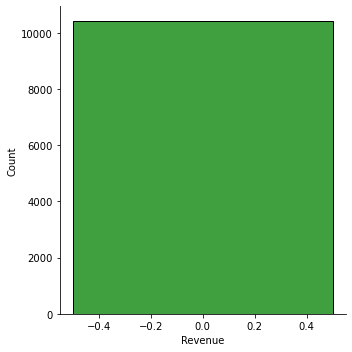

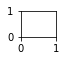

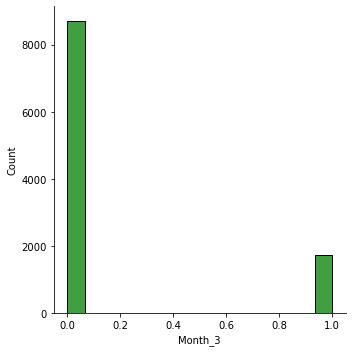

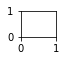

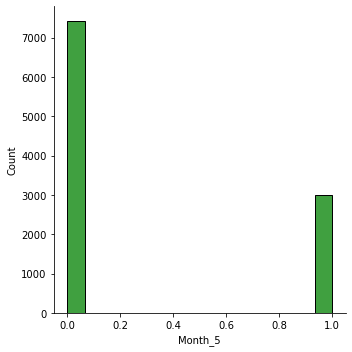

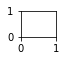

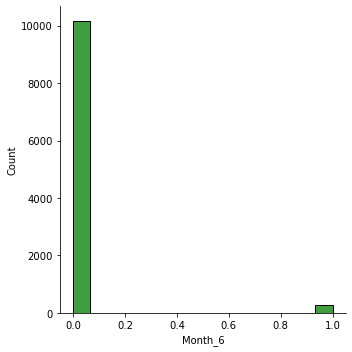

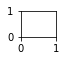

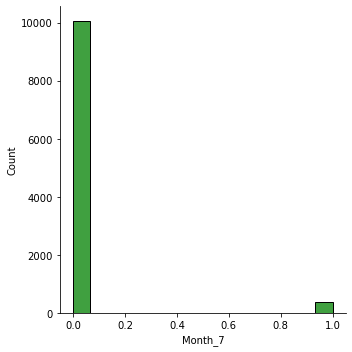

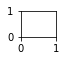

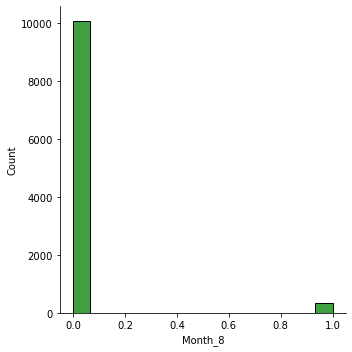

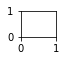

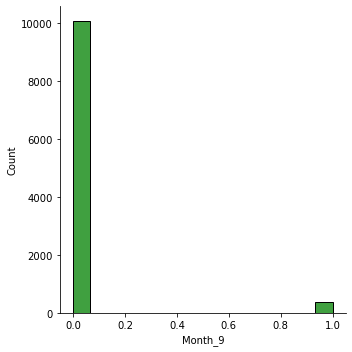

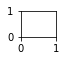

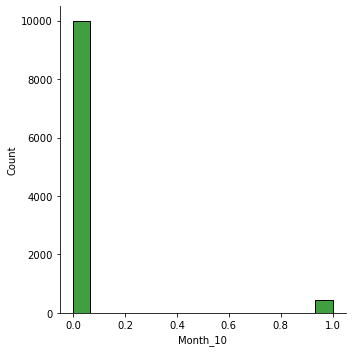

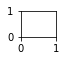

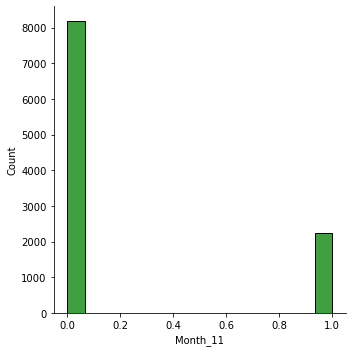

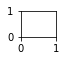

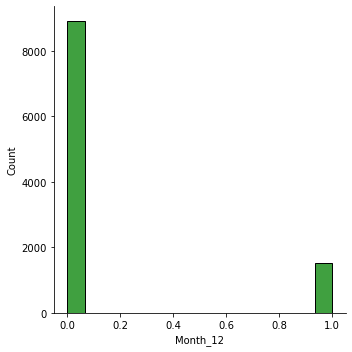

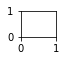

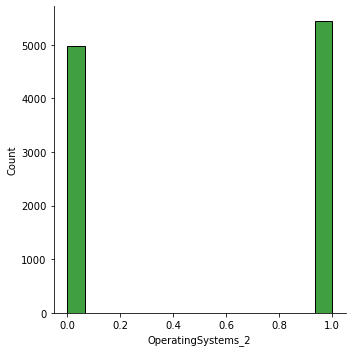

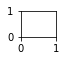

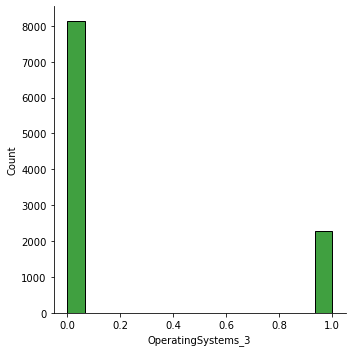

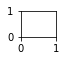

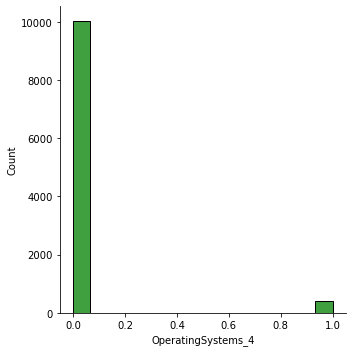

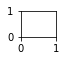

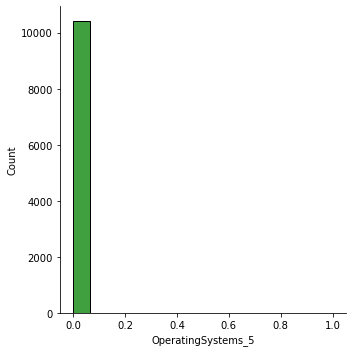

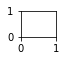

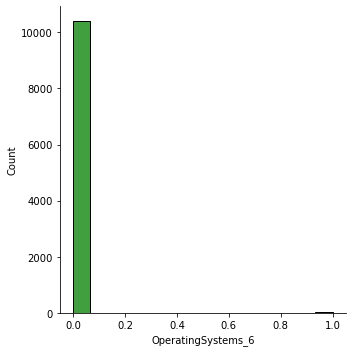

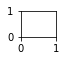

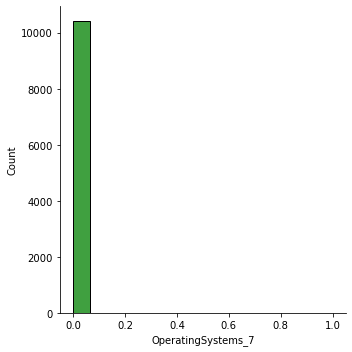

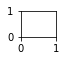

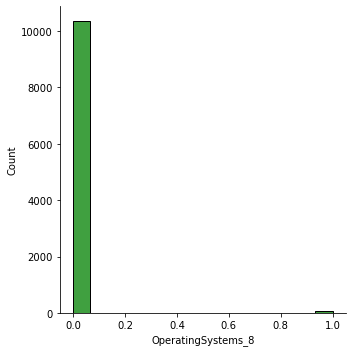

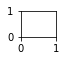

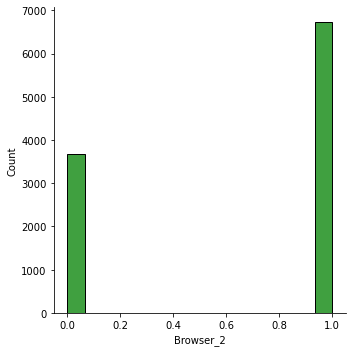

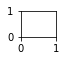

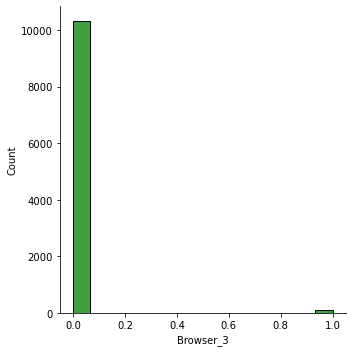

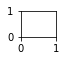

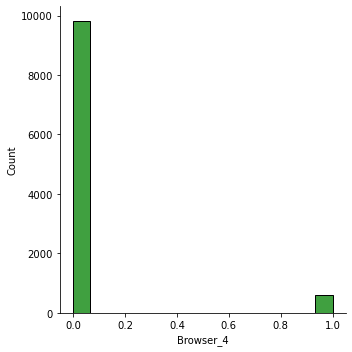

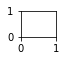

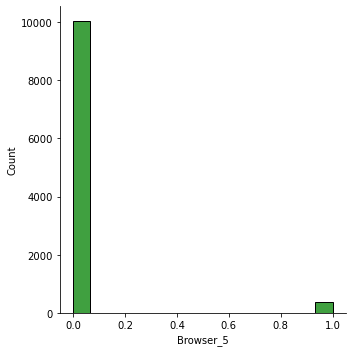

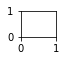

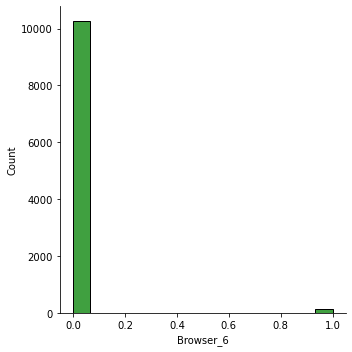

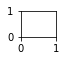

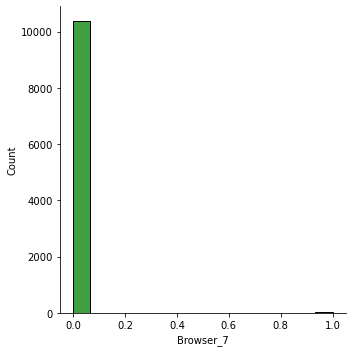

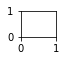

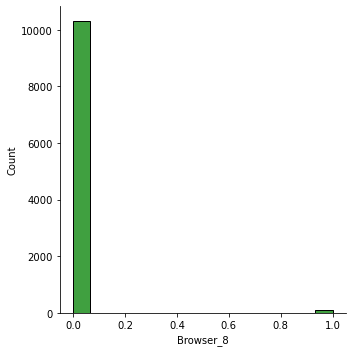

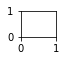

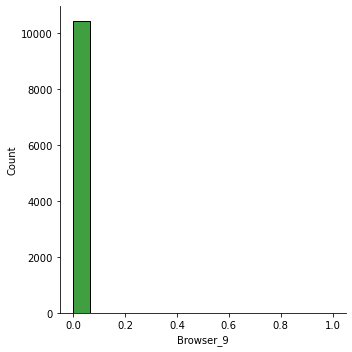

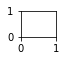

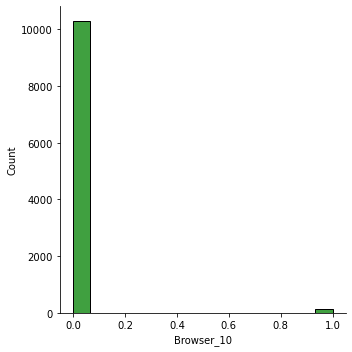

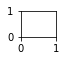

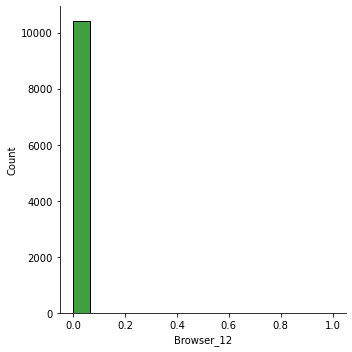

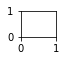

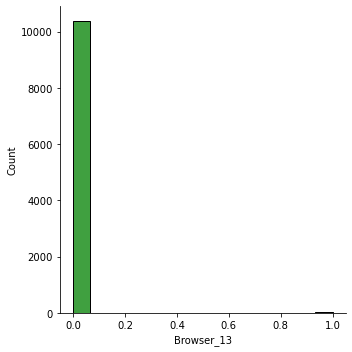

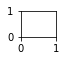

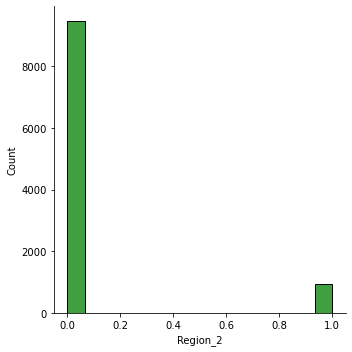

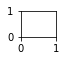

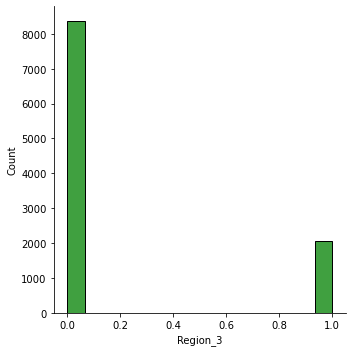

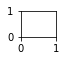

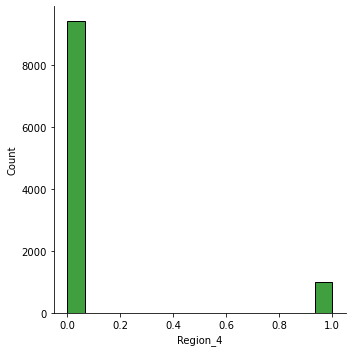

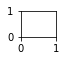

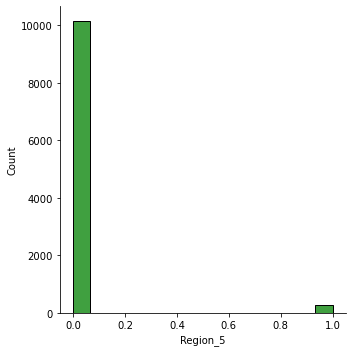

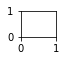

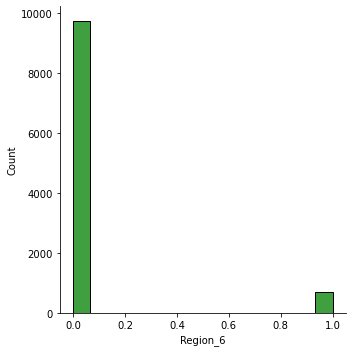

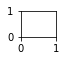

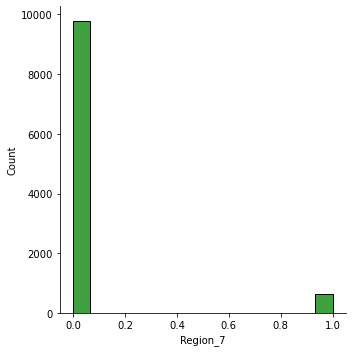

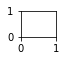

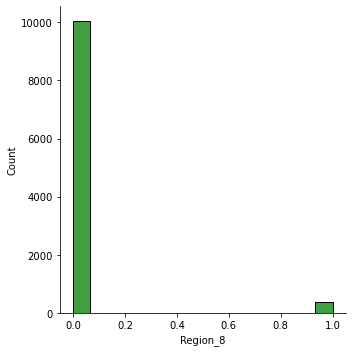

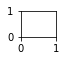

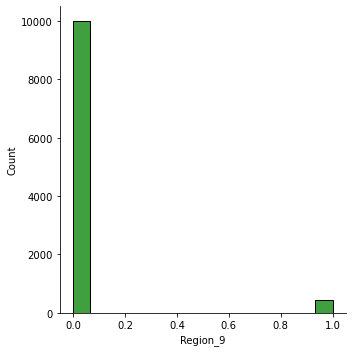

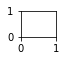

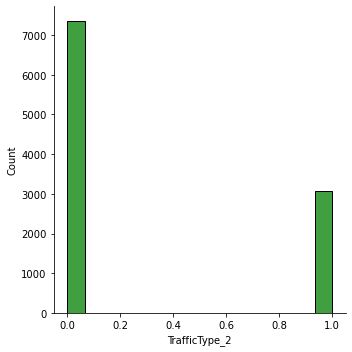

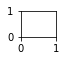

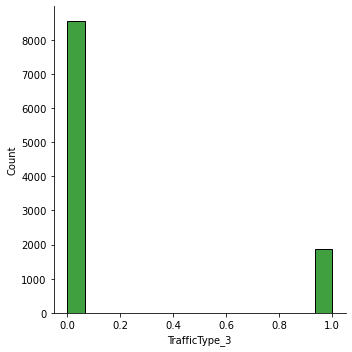

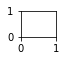

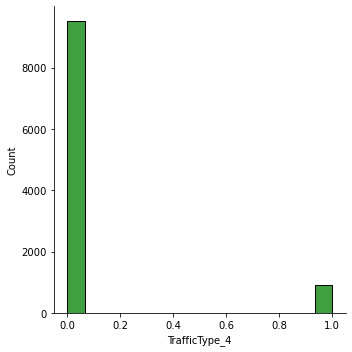

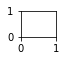

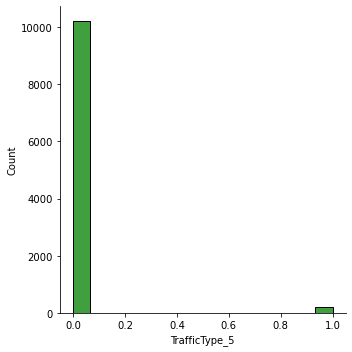

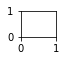

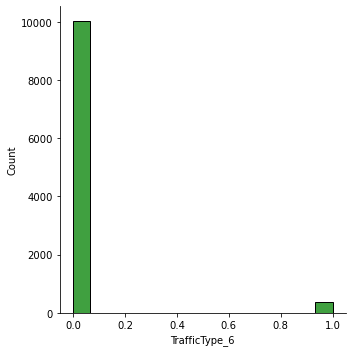

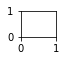

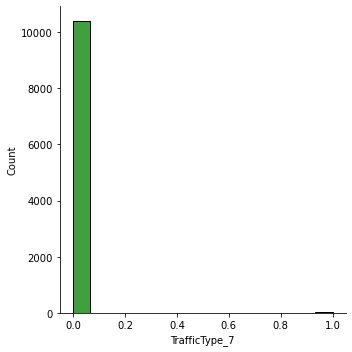

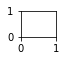

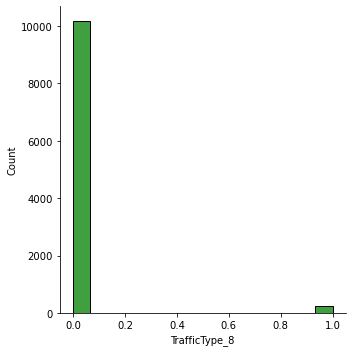

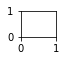

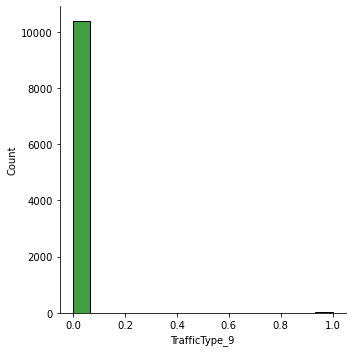

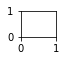

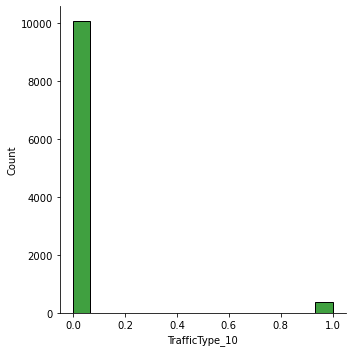

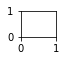

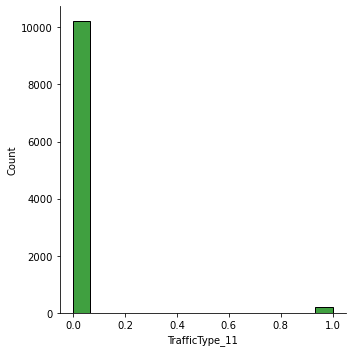

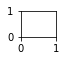

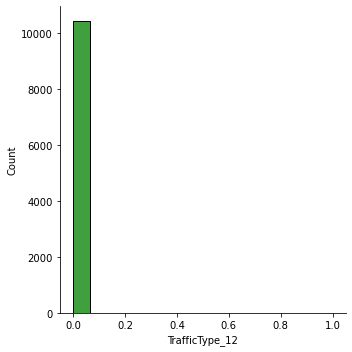

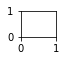

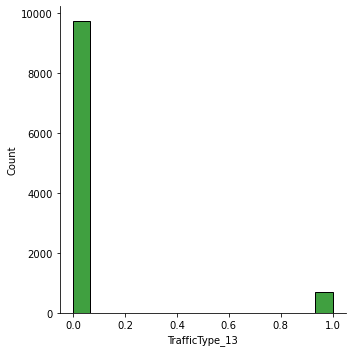

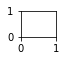

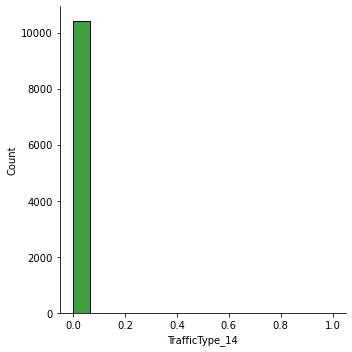

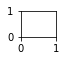

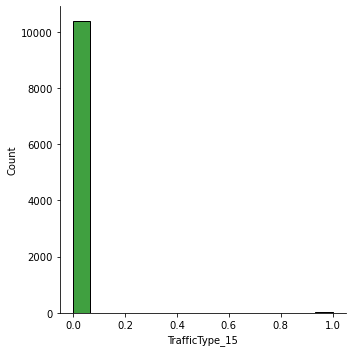

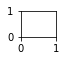

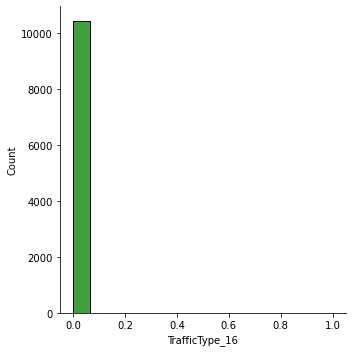

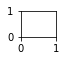

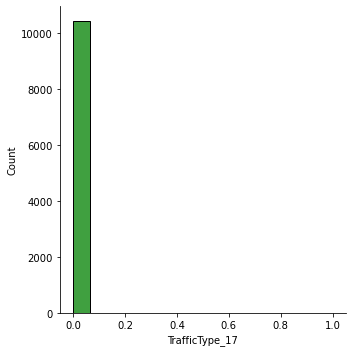

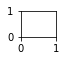

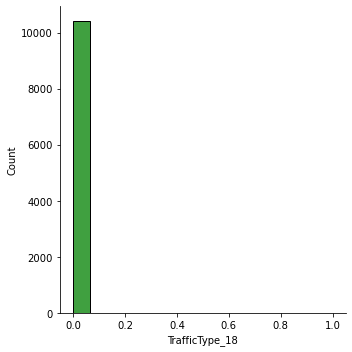

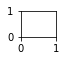

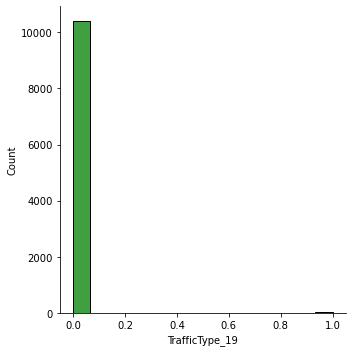

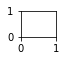

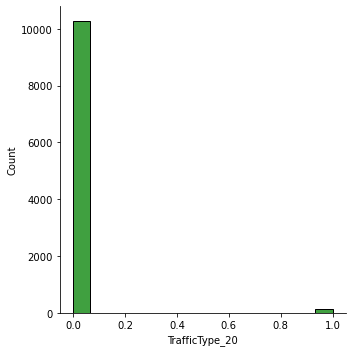

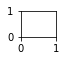

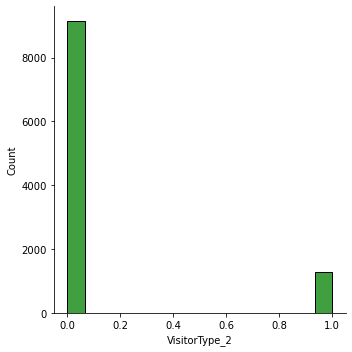

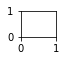

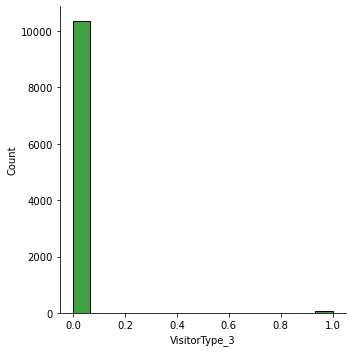

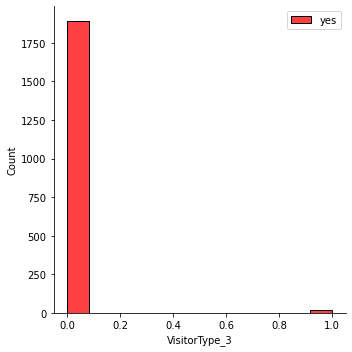

In [15]:
### 7. Feature selection 

### There are some highly correlated features (as shown in heatmap)
### Let's get rid of redundant variables
import numpy as np
import seaborn as sns 

keep_columns = np.full((cor.shape[0],), True, dtype=bool)
for i in range(cor.shape[0] - 1): 
    for j in range(i+1, cor.shape[0] - 1): 
        if (np.abs(cor.iloc[i,j]) >= 0.8): 
            if keep_columns[j]:
                keep_columns[j] = False 
                
selected_columns = df_final.columns[keep_columns]

df_out = df_final[selected_columns]

### Column check
print('The folloing columns are present in the new df:')
print(selected_columns)
print(f'The old df had {df_final.shape[1]} features. The new df has {df_out.shape[1]} features. ')

### Visualize the selected features 
fig = plt.figure(figsize = (20, 25))
j = 0 
for i in df_out.columns:
    plt.subplot(10, 7, j+1)
    j += 1
    sns.displot(df_out[i][df_final.Revenue==0], color='g', label='no')
    sns.displot(df_out[i][df_final.Revenue==1], color='r', label='yes')
    plt.legend(loc='best')
fig.suptitle('Revenue Feature Analysis')
fig.tight_layout()
fig.subplots_adjust(top=0.95)
plt.show()

In [16]:
### 8.Train / Test data split
# (1) Creat a list of months for training dataset: June-Dec
train_month = ['June', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
test_month = ['Feb', 'Mar']

# (2) Select training dataset
df_train = df_out[df['Month'].isin(train_month)]
df_test = df_out[df['Month'].isin(test_month)]

# Check the validity of split
print(df[df['Month'].isin(train_month)].Month.unique())
print(df[df['Month'].isin(test_month)].Month.unique())

print(df_out.shape)
print(df_train.shape)
print(df_test.shape)
print(df['Month'].value_counts())

# (3) Separate target (label) from features - Train and Test sets 
y_train = df_train['Revenue']
X_train = df_train.drop('Revenue', axis = 1)

y_test = df_test['Revenue']
X_test = df_test.drop('Revenue', axis = 1)

# (4) Dimension checks

print(X_train.shape)
print(y_train.shape)

print(X_test.shape)
print(y_test.shape)


['Oct' 'June' 'Jul' 'Aug' 'Nov' 'Sep' 'Dec']
['Feb' 'Mar']
(12330, 66)
(6875, 66)
(2091, 66)
May     3364
Nov     2998
Mar     1907
Dec     1727
Oct      549
Sep      448
Aug      433
Jul      432
June     288
Feb      184
Name: Month, dtype: int64
(6875, 65)
(6875,)
(2091, 65)
(2091,)


-----------------------------------------------------------------
(1) Logistic Regression without weights
The f1 score for the model is: 0.48056537102473507
The accuracy for the model is: 0.9296987087517934
The recall score for the model is: 0.4666666666666667
ROC_AUC score for the model is: 0.9569863680623174
[[1876   20]
 [ 127   68]]
-----------------------------------------------------------------
(2) Logistic Regression with balanced weights
The f1 score for the model model is: 0.7028301886792452
The accuracy for mode model is: 0.93974175035868
The recall score for the model is: 0.8871794871794872
ROC_AUC score for the model is: 0.9648842367196797
[[1816   80]
 [  46  149]]
Feature: 0, Score: 0.03009
Feature: 1, Score: -0.00003
Feature: 2, Score: 0.02149
Feature: 3, Score: 0.00005
Feature: 4, Score: 0.00608
Feature: 5, Score: -4.31483
Feature: 6, Score: 0.08921
Feature: 7, Score: 0.00000
Feature: 8, Score: 0.04355
Feature: 9, Score: 0.00000
Feature: 10, Score: 0.00000
Feature: 11,

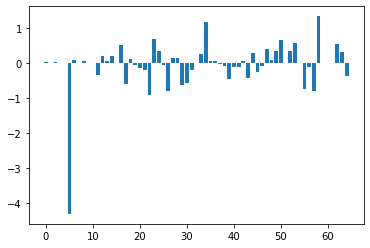

In [33]:
### 9. Fit classification models 
#from sklearn.linear_model import LassoCV
import numpy as np
from sklearn.linear_model import LogisticRegression

# from xgboost import XGBClassifier
# from xgboost import plot_importance

from sklearn.metrics import f1_score, accuracy_score, confusion_matrix, roc_auc_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

model_lr = LogisticRegression(solver='newton-cg')

# Fit model without weighting 
model_lr.fit(X_train, y_train)

# Evaluate model by using test sets: Focus on roc_auc and F1 score 

y_pred = model_lr.predict(X_test)
y_pred_proba = model_lr.predict_proba(X_test)[::,1]

# Printing f1, accuracy score, recall score, and ROC_AUC    
print('-----------------------------------------------------------------')
print('(1) Logistic Regression without weights')
print('The f1 score for the model is:',f1_score(y_test, y_pred))
print('The accuracy for the model is:', accuracy_score(y_test, y_pred))
print('The recall score for the model is:', np.mean(cross_val_score(model_lr, X_test, y_test, scoring='recall', cv=5)))
print('ROC_AUC score for the model is:', roc_auc_score(y_test, y_pred_proba))
# Ploting the cunfusion matrix
print(confusion_matrix(y_test, y_pred))

# (2) Binary logistic model with weighting for sample balance 
# Instantiate model
model_lrb = LogisticRegression(solver='newton-cg', class_weight='balanced')

# Fit model with weighting to take care of imbalance of the data
model_lrb.fit(X_train, y_train)

# Evaluate model by using test sets: Focus on roc_auc and F1 score 
y_pred2 = model_lrb.predict(X_test)
y_pred_proba2 = model_lrb.predict_proba(X_test)[::,1]

# Printing f1, accuracy score, recall score, and ROC_AUC    
print('-----------------------------------------------------------------')
print('(2) Logistic Regression with balanced weights')
print('The f1 score for the model model is:',f1_score(y_test, y_pred2))
print('The accuracy for mode model is:', accuracy_score(y_test, y_pred2))
print('The recall score for the model is:', np.mean(cross_val_score(model_lrb, X_test, y_test, scoring='recall', cv=5)))
print('ROC_AUC score for the model is:', roc_auc_score(y_test, y_pred_proba2))
# Ploting the cunfusion matrix
print(confusion_matrix(y_test, y_pred2))

# Feature importance
importance = model_lrb.coef_[0]
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()


In [32]:
# (3) Random forest classification model with balanced weights 
# hyper-parameter tuning with 5 fold cross validation 
from sklearn.ensemble import RandomForestClassifier

# Instantiate model
model_rf = RandomForestClassifier(random_state=0, class_weight = 'balanced')

# Set up hyperparameter grids
SEED = 1
gbm_param_grid = {'max_depth': [5, 10]}
                  #'n_estimators': [200, 500],
                  #'max_features': ['auto', 'sqrt', 'log2']}

# Fit model with weighting to take care of imbalance of the data
grid_cv = GridSearchCV(estimator=model_rf, param_grid = gbm_param_grid, 
                    cv=5, verbose=False)

grid_cv.fit(X_train, y_train)

# Evaluate model by using test sets: Focus on roc_auc and F1 score 
y_pred3 = grid_cv.predict(X_test)
y_pred_proba3 = grid_cv.predict_proba(X_test)[::,1]

# Printing f1, accuracy score, recall score, and ROC_AUC    
print('-----------------------------------------------------------------')
print('(3) Random Forest with balanced weights')
print('The f1 score for the model model is:',f1_score(y_test, y_pred3))
print('The accuracy for mode model is:', accuracy_score(y_test, y_pred3))
print('The recall score for the model is:', np.mean(cross_val_score(grid_cv, X_test, y_test, scoring='recall', cv=5)))
print('ROC_AUC score for the model is:', roc_auc_score(y_test, y_pred_proba3))

# Ploting the cunfusion matrix
print(confusion_matrix(y_test, y_pred3))

# Print best parameters
print(grid_cv.best_params_)



-----------------------------------------------------------------
(3) Random Forest with balanced weights
The f1 score for the model model is: 0.7842323651452283
The accuracy for mode model is: 0.9502630320420852
The recall score for the model is: 0.9487179487179487
ROC_AUC score for the model is: 0.981686140863356
[[1798   98]
 [   6  189]]
{'max_depth': 10}


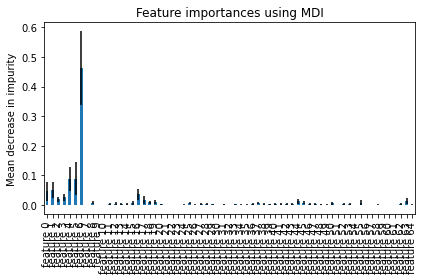

In [48]:
# Feature importance
# Instantiate model with optimized max depth = 10
model_rf2 = RandomForestClassifier(random_state=0, class_weight = 'balanced', max_depth = 10)
# Fit the model 
model_rf2.fit(X_train, y_train)

# Obtain feature importance 
importances = model_rf2.feature_importances_
feature_names = [f'feature {i}' for i in range(X_train.shape[1])]

forest_importances = pd.Series(importances, index=feature_names)
std = np.std([
    tree.feature_importances_ for tree in model_rf2.estimators_], axis=0)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

Task 2: Generate user-behavior clusters based on the purchasing behavior data for the complete dataset. (25 points).
- How many clusters do you see? 
- What are the significant differences between the various clusters in terms of the size of the clusters and purchase ratio? 
- Perform as detailed analysis of the clusters as you can.
- Return plots and cluster images generated for the data.
- Perform a detailed analysis for each cluster corresponding to the variations in features and identify some behaviors  corresponding to each particular cluster (e.g,. which cluster represent new shoppers vs. brand conscious shoppers etc.).


C:\Users\minhahwang\Anaconda3\lib\site-packages\yellowbrick\utils\kneed.py:155: YellowbrickWarning: No 'knee' or 'elbow point' detected This could be due to bad clustering, no actual clusters being formed etc.
  warnings.warn(warning_message, YellowbrickWarning)
C:\Users\minhahwang\Anaconda3\lib\site-packages\yellowbrick\cluster\elbow.py:343: YellowbrickWarning: No 'knee' or 'elbow' point detected, pass `locate_elbow=False` to remove the warning
  warnings.warn(warning_message, YellowbrickWarning)


AttributeError: 'KMeans' object has no attribute 'k'

AttributeError: 'KMeans' object has no attribute 'k'

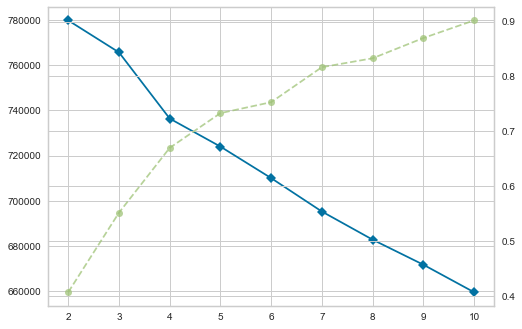

In [55]:
from sklearn.cluster import KMeans
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from yellowbrick.cluster import KElbowVisualizer 

### 1. Conduct KMeans clustering

# Prepare data (by dropping the revenue column)
df_cluster = df_out.drop('Revenue', axis = 1)

# Instantiate KMeans with 4 clusters
preprocess = make_pipeline(StandardScaler())
X_preprocess = preprocess.fit_transform(df_cluster)

kmeans = KMeans(init="random", n_init = 10, max_iter=10000, random_state=0)

visualizer_kmeans = KElbowVisualizer(kmeans)
visualizer_kmeans.fit(X_preprocess)


In [69]:
### Once figuring out optimal number of clusters: The within cluster errors keep going down without clear elobw point. 
### This is happening since we have too many categorical variables and KMeans are not great with many categorical variables. 
### I will select 3 as number of clusters
# Train the model
kmeans_final = KMeans(n_clusters = 3)
kmeans_final.fit(X_preprocess)

# Make predictions 
cluster_ids = kmeans_final.predict(X_preprocess)

# Select columns
selected_columns = ['Administrative', 'Administrative_Duration', 'Informational', 'Informational_Duration', 
                    'ProductRelated', 'BounceRates', 'PageValues', 
                    'SpecialDay', 
                   'Weekend', 'Month_3', 'Month_5', 'Month_6',
                   'Month_7', 'Month_8', 'Month_9', 'Month_10', 'Month_11', 'Month_12',
                   'OperatingSystems_2', 'OperatingSystems_3', 'OperatingSystems_4',
                   'OperatingSystems_5', 'OperatingSystems_6', 'OperatingSystems_7',
                   'OperatingSystems_8', 'Browser_2', 'Browser_3', 'Browser_4',
                   'Browser_5', 'Browser_6', 'Browser_7', 'Browser_8', 'Browser_9',
                   'Browser_10', 'Browser_12', 'Browser_13', 'Region_2', 'Region_3',
                   'Region_4', 'Region_5', 'Region_6', 'Region_7', 'Region_8', 'Region_9',
                   'TrafficType_2', 'TrafficType_3', 'TrafficType_4', 'TrafficType_5',
                   'TrafficType_6', 'TrafficType_7', 'TrafficType_8', 'TrafficType_9',
                   'TrafficType_10', 'TrafficType_11', 'TrafficType_12', 'TrafficType_13',
                   'TrafficType_14', 'TrafficType_15', 'TrafficType_16', 'TrafficType_17',
                   'TrafficType_18', 'TrafficType_19', 'TrafficType_20', 'VisitorType_2',
                   'VisitorType_3']
                    
# Generate summary statistics by cluster IDs                    
temp_df = pd.DataFrame(df_cluster[selected_columns])
temp_df['Revenue'] = df_final['Revenue']
temp_df['ClusterID'] = cluster_ids

### Describe clusters by group
aggregation1 = {'Revenue':'mean', 'Administrative':'mean', 
                'Administrative_Duration': 'mean', 
                'Informational': 'mean', 
                'Informational_Duration': 'mean', 
                'ProductRelated': 'mean',
                'BounceRates': 'mean', 
                'PageValues':'mean'}

aggregation2 = {'SpecialDay':'mean',
                'Weekend':'mean',
                'Month_3': 'mean', 
                'Month_5': 'mean', 
                'Month_6': 'mean',
                'Month_7': 'mean',
                'Month_8': 'mean', 
                'Month_9': 'mean', 
                'Month_10': 'mean',
                'Month_11': 'mean', 
                'Month_12': 'mean'}

aggregation3 = {'OperatingSystems_2': 'mean',
                'OperatingSystems_3': 'mean', 
                'OperatingSystems_4': 'mean', 
                'OperatingSystems_5': 'mean', 
                'OperatingSystems_6': 'mean', 
                'OperatingSystems_7': 'mean', 
                'OperatingSystems_8': 'mean', 
                'Browser_2': 'mean', 
                'Browser_3': 'mean', 
                'Browser_4': 'mean',
                'Browser_5': 'mean', 
                'Browser_6': 'mean', 
                'Browser_7': 'mean',
                'Browser_8': 'mean', 
                'Browser_9': 'mean', 
                'Browser_10': 'mean', 
                'Browser_12': 'mean', 
                'Browser_13': 'mean' }

aggregation4 = {'Region_2': 'mean', 
                'Region_3': 'mean',
                'Region_4': 'mean', 
                'Region_5': 'mean', 
                'Region_6': 'mean', 
                'Region_7': 'mean', 
                'Region_8': 'mean', 
                'Region_9': 'mean', 
                'TrafficType_2': 'mean', 
                'TrafficType_3': 'mean', 
                'TrafficType_4': 'mean', 
                'TrafficType_5': 'mean',
                'TrafficType_6': 'mean', 
                'TrafficType_7': 'mean', 
                'TrafficType_8': 'mean', 
                'TrafficType_9': 'mean',
                'TrafficType_10': 'mean', 
                'TrafficType_11': 'mean', 
                'TrafficType_12': 'mean', 
                'TrafficType_13': 'mean',
                'TrafficType_14': 'mean', 
                'TrafficType_15': 'mean', 
                'TrafficType_16': 'mean', 
                'TrafficType_17': 'mean',
                'TrafficType_18': 'mean',  
                'TrafficType_19': 'mean',  
                'TrafficType_20': 'mean',  
                'VisitorType_2': 'mean', 
                'VisitorType_3': 'mean'}

cluster_summary1 = temp_df.groupby('ClusterID').agg(aggregation1)
cluster_summary2 = temp_df.groupby('ClusterID').agg(aggregation2)
cluster_summary3 = temp_df.groupby('ClusterID').agg(aggregation3)
cluster_summary4 = temp_df.groupby('ClusterID').agg(aggregation4)

print(cluster_summary1)
print(cluster_summary2)
print(cluster_summary3)
print(cluster_summary4)


            Revenue  Administrative  Administrative_Duration  Informational  \
ClusterID                                                                     
0          0.172605        2.477661                86.325037       0.546205   
1          0.253968        1.746032                72.408069       0.222222   
2          0.106830        1.906305                66.763604       0.398716   

           Informational_Duration  ProductRelated  BounceRates  PageValues  
ClusterID                                                                   
0                       38.517980       34.156317     0.020065    5.964983  
1                        4.567725       14.888889     0.036456   25.434336  
2                       24.582439       25.783713     0.027416    5.334435  
           SpecialDay   Weekend  Month_3   Month_5   Month_6   Month_7  \
ClusterID                                                                
0            0.000452  0.241941   0.2157  0.000905  0.032462  0.048863 

Key observations) 

Cluster 0 has highest revenue (i.e. more % of purchase). This happens when users spend more time with Adminstrative, Informational, and ProductRelated Pages. Cluster 0 tends to have lower BounceRates and higher PageValues as well. Cluster 0/2 are more weekend clusters. Cluster 2 is special day cluster. Cluster 1 is mostly from OperatingSystems8. In contrast, Cluster 0/2 are mostly from OperatingSystems 2 and 3. Cluster 1 is mostly VisitorType_3. In constrat, Cluster 0/2 are mostly VisitorType1. 


Task 3: Consider you have training data (with the 'Revenue' attribute) for records from June-Sept only. For all records from Oct-Dec, the 'Revenue' attribute is missing. Build a semi-supervised self-labeling model to estimate 'Revenue' for the missing records in Oct-Dec and then fit your classifier. Report classification performance on Feb-March data set with and without the self-labeled data. (15 points)
- If you do not consider the records from Oct-Dec, generate the classification performance on test data
- After using the self-labeled data and training data together, does the classification performance on test data improve? Discuss which metrics are most important for your conclusion.


In [91]:
# 1. Set up time frame for each data type
train_month = ['June', 'Jul', 'Aug', 'Sep']
unlabeled_month = ['Oct', 'Nov', 'Dec']
test_month = ['Feb', 'Mar']

# 2. Separate data sets
df_train2 = df_out[df['Month'].isin(train_month)]
df_unlabeled2 = df_out[df['Month'].isin(unlabeled_month)]
df_test2 = df_out[df['Month'].isin(test_month)]


# 3. Separate target (label) from features - Train and Test sets 
y_train2 = df_train2[['Revenue']].values
X_train2 = df_train2.drop('Revenue', axis = 1)

y_unlabeled2 = df_unlabeled2[['Revenue']].values
X_unlabeled2 = df_unlabeled2.drop('Revenue', axis = 1)

y_test2 = df_test2[['Revenue']].values
X_test2 = df_test2.drop('Revenue', axis = 1)

# 4. Dimension checks

print(X_train2.shape)
print(y_train2.shape)

print(X_unlabeled2.shape)
print(y_unlabeled2.shape)

print(X_test2.shape)
print(y_test2.shape)



(1601, 65)
(1601, 1)
(5274, 65)
(5274, 1)
(2091, 65)
(2091, 1)


In [102]:
# Combine train and unlabelled after setting y for unlabelled as -1
X = np.concatenate((X_train2, X_unlabeled2), axis = 0)
n_labeled_points = X_train2.shape[0]

y = np.concatenate((y_train2, -1*np.ones((n_unlabeled_points,1))), axis=0) 
train_indicies = np.arange(len(y))
unlabeled_set = train_indicies[n_labeled_points:]


In [125]:
from sklearn.semi_supervised import LabelSpreading 

# Initialize the model
lp_model = LabelSpreading(kernel='knn', alpha=0.01, n_neighbors=7)
# Train the model 
lp_model.fit(X, y)

# Predict labels
predicted_labels = lp_model.transduction_[unlabeled_set]


C:\Users\minhahwang\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [129]:
# Define new y as y_train2 + predicted_labels
y2 = np.concatenate((y_train2, predicted_labels.reshape(-1,1)), axis = 0)

In [127]:
# (1) Binary logistic model with weighting for sample balance: Without unlabeled data
# Instantiate model
model_lrb = LogisticRegression(solver='newton-cg', class_weight='balanced')

# Fit model with weighting to take care of imbalance of the data
model_lrb.fit(X_train2, y_train2)

# Evaluate model by using test sets: Focus on roc_auc and F1 score 
y_pred2 = model_lrb.predict(X_test2)
y_pred_proba2 = model_lrb.predict_proba(X_test2)[::,1]

# Printing f1, accuracy score, recall score, and ROC_AUC    
print('-----------------------------------------------------------------')
print('(2) Logistic Regression with balanced weights')
print('The f1 score for the model model is:',f1_score(y_test2, y_pred2))
print('The accuracy for mode model is:', accuracy_score(y_test2, y_pred2))
print('The recall score for the model is:', np.mean(cross_val_score(model_lrb, X_test2, y_test2, scoring='recall', cv=5)))
print('ROC_AUC score for the model is:', roc_auc_score(y_test2, y_pred_proba2))
# Ploting the cunfusion matrix
print(confusion_matrix(y_test2, y_pred2))


C:\Users\minhahwang\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\minhahwang\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


-----------------------------------------------------------------
(2) Logistic Regression with balanced weights
The f1 score for the model model is: 0.7177242888402625
The accuracy for mode model is: 0.9383070301291249


C:\Users\minhahwang\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\minhahwang\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\minhahwang\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\minhahwang\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ),

The recall score for the model is: 0.8871794871794872
ROC_AUC score for the model is: 0.95
[[1798   98]
 [  31  164]]


In [128]:
# (1) Binary logistic model with weighting for sample balance: With unlabeled data
# Instantiate model
model_lrb2 = LogisticRegression(solver='newton-cg', class_weight='balanced')

# Fit model with weighting to take care of imbalance of the data
model_lrb2.fit(X, y2)

# Evaluate model by using test sets: Focus on roc_auc and F1 score 
y_pred3 = model_lrb2.predict(X_test2)
y_pred_proba3 = model_lrb2.predict_proba(X_test2)[::,1]

# Printing f1, accuracy score, recall score, and ROC_AUC    
print('-----------------------------------------------------------------')
print('(2) Logistic Regression with balanced weights')
print('The f1 score for the model model is:',f1_score(y_test2, y_pred3))
print('The accuracy for mode model is:', accuracy_score(y_test2, y_pred3))
print('The recall score for the model is:', np.mean(cross_val_score(model_lrb2, X_test2, y_test2, scoring='recall', cv=5)))
print('ROC_AUC score for the model is:', roc_auc_score(y_test2, y_pred_proba3))
# Ploting the cunfusion matrix
print(confusion_matrix(y_test2, y_pred3))


C:\Users\minhahwang\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


-----------------------------------------------------------------
(2) Logistic Regression with balanced weights
The f1 score for the model model is: 0.7010752688172044
The accuracy for mode model is: 0.9335246293639407


C:\Users\minhahwang\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\minhahwang\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\minhahwang\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\minhahwang\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ),

The recall score for the model is: 0.8871794871794872
ROC_AUC score for the model is: 0.9609407118900791
[[1789  107]
 [  32  163]]


C:\Users\minhahwang\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [ ]:
Observation)

With label spreading, there is an slight increase in ROC_AUC: 0.95 -> 0.9609